In [1]:
#Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
#1. Preliminary Analysis

In [5]:
#Importing the Dataset

In [6]:
cwd = os.getcwd()
dataset_dir = os.path.join(cwd,'Dataset')
dataset_path = os.path.join(dataset_dir,'1645792390_cep1_dataset.xlsx')
dataset = pd.read_excel(dataset_path)

In [7]:
#Understanding the dataset

In [8]:
#   •   age: The person's age in years
#   •   sex: The person's sex (1 = male, 0 = female)
#
#   •   cp: chest pain type
#   	-- Value 0: asymptomatic
#   	-- Value 1: atypical angina
#   	-- Value 2: non-anginal pain
#   	-- Value 3: typical angina
#
#   •   trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
#   •   chol: The person's cholesterol measurement in mg/dl
#   •   fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
#
#   •   restecg: resting electrocardiographic results
#   	-- Value 0: showing probable or definite left ventricular 	hypertrophy by Estes' criteria
#   	-- Value 1: normal
#   	-- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#
#   •   thalach: The person's maximum heart rate achieved
#   •   exang: Exercise induced angina (1 = yes; 0 = no)
#   •   oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
#   •   slope: the slope of the peak exercise ST segment (0: downsloping; 1: flat; 2: upsloping)
#   •   ca: The number of major vessels (0-3)
#   •   thal: Results of the blood flow observed via the radioactive dye.
# 
#   	Value 1: fixed defect (no blood flow in some part of the heart)
#   	Value 2: normal blood flow
#   	Value 3: reversible defect (a blood flow is observed but it is not normal)
# 
#   •   target : 0 = disease, 1 = no disease

In [9]:
dataset.shape

(303, 14)

In [10]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
#1.a. Finding out null values in dataset. If 0 means no missing value.

In [14]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
#Checking if dataset is imbalanced or not.

In [16]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [17]:
#1.b. Checking for duplicates

In [18]:
dataset[dataset.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [19]:
#Removing duplicates

In [20]:
dataset.drop_duplicates(keep='last',inplace=True)
dataset.shape

(302, 14)

In [21]:
#2. Understanding distribution of disease and related factors

In [22]:
#2.a. Preliminary statistical summary of the data

In [23]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
#For ca max should be 3 as it lies between 0-3
#For thal min should be 1 as it lies between 1-3
#So dropping those rows

In [25]:
dataset = dataset[(dataset['ca'] >= 0) & (dataset['ca'] <= 3)]
dataset = dataset[(dataset['thal'] >= 1) & (dataset['thal'] <= 3)]
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [26]:
#Exploring the measures of central tendencies and spread of the data

In [27]:
# Measures of central tendency
print("Mean:")
print(dict(dataset.mean().map('{:,.4f}'.format)))
print("\nMedian:")
print(dict(dataset.median()))
print("\nMode:")
print(dict(dataset.mode().iloc[0]))

# Measures of spread
print("\nStandard Deviation:")
print(dict(dataset.std().map('{:,.4f}'.format)))
print("\nRange:")
print(dict(dataset.max() - dataset.min()))
print("\nInterquartile Range:")
print(dict(dataset.quantile(0.75) - dataset.quantile(0.25)))

Mean:
{'age': '54.5236', 'sex': '0.6791', 'cp': '0.9595', 'trestbps': '131.6047', 'chol': '247.1554', 'fbs': '0.1453', 'restecg': '0.5236', 'thalach': '149.5608', 'exang': '0.3277', 'oldpeak': '1.0591', 'slope': '1.3953', 'ca': '0.6791', 'thal': '2.3277', 'target': '0.5405'}

Median:
{'age': 56.0, 'sex': 1.0, 'cp': 1.0, 'trestbps': 130.0, 'chol': 242.5, 'fbs': 0.0, 'restecg': 1.0, 'thalach': 152.5, 'exang': 0.0, 'oldpeak': 0.8, 'slope': 1.0, 'ca': 0.0, 'thal': 2.0, 'target': 1.0}

Mode:
{'age': 58.0, 'sex': 1.0, 'cp': 0.0, 'trestbps': 120.0, 'chol': 197.0, 'fbs': 0.0, 'restecg': 1.0, 'thalach': 162.0, 'exang': 0.0, 'oldpeak': 0.0, 'slope': 2.0, 'ca': 0.0, 'thal': 2.0, 'target': 1.0}

Standard Deviation:
{'age': '9.0595', 'sex': '0.4676', 'cp': '1.0342', 'trestbps': '17.7266', 'chol': '51.9770', 'fbs': '0.3530', 'restecg': '0.5267', 'thalach': '22.9708', 'exang': '0.4702', 'oldpeak': '1.1665', 'slope': '0.6182', 'ca': '0.9397', 'thal': '0.5857', 'target': '0.4992'}

Range:
{'age': 48.0,

In [28]:
#2.b. Identifying Categorical data variables and plotting them for visualization

In [29]:
graph_dir = os.path.join(cwd,'Graph')

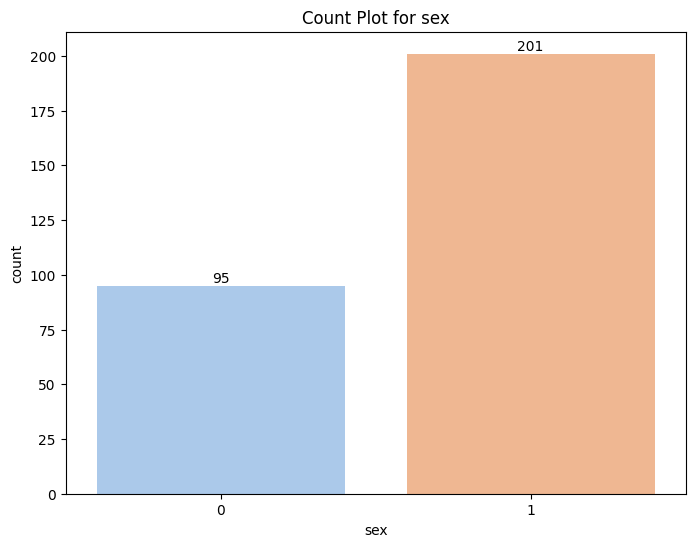

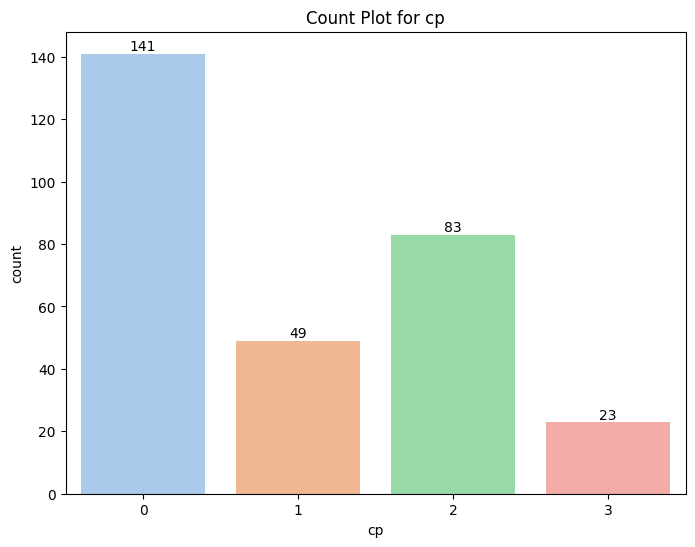

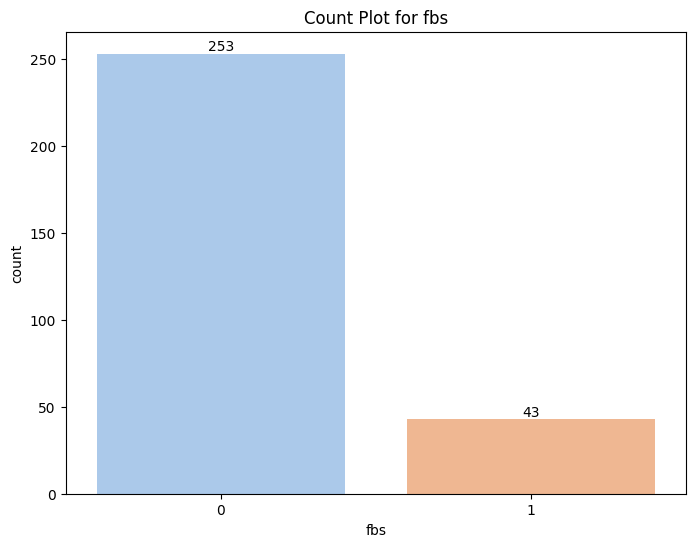

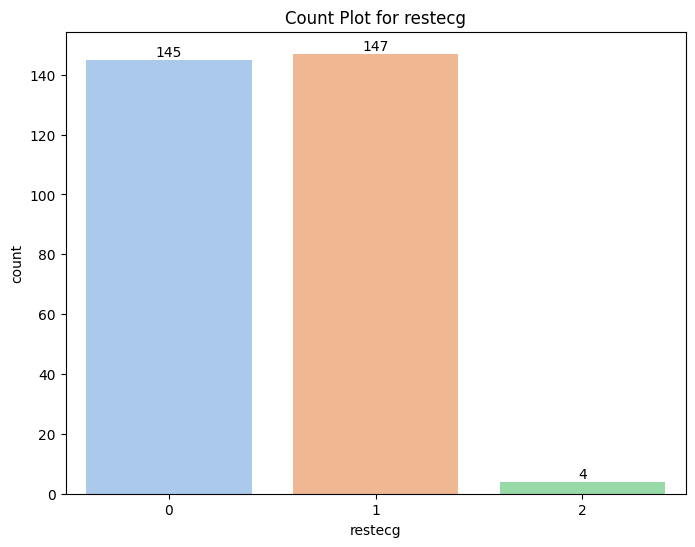

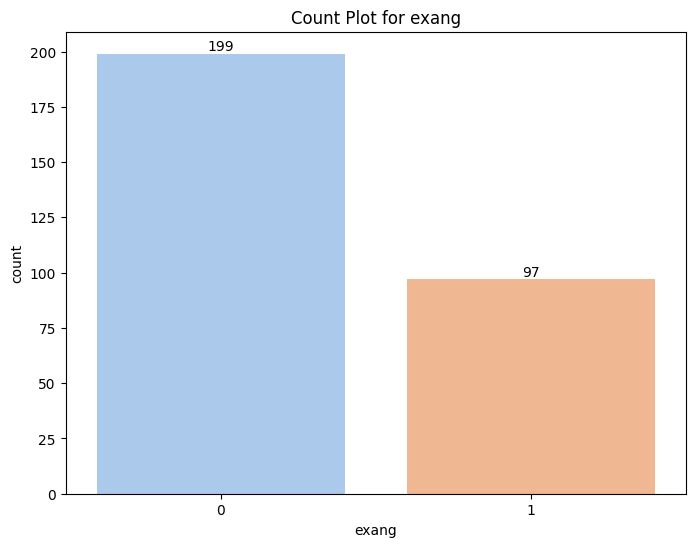

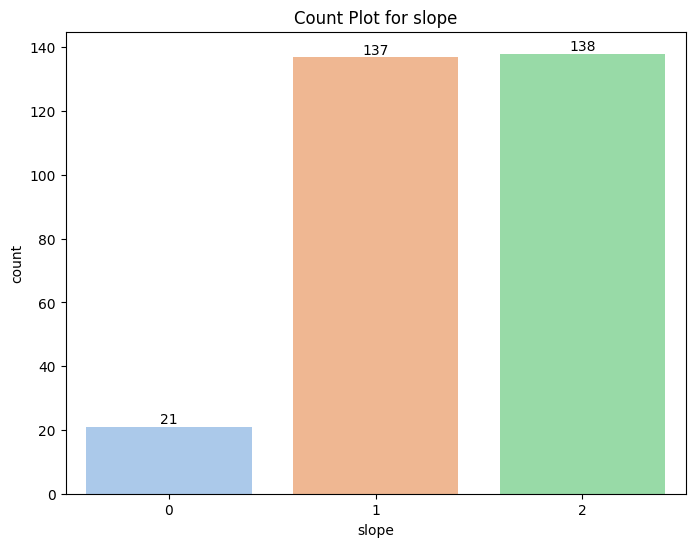

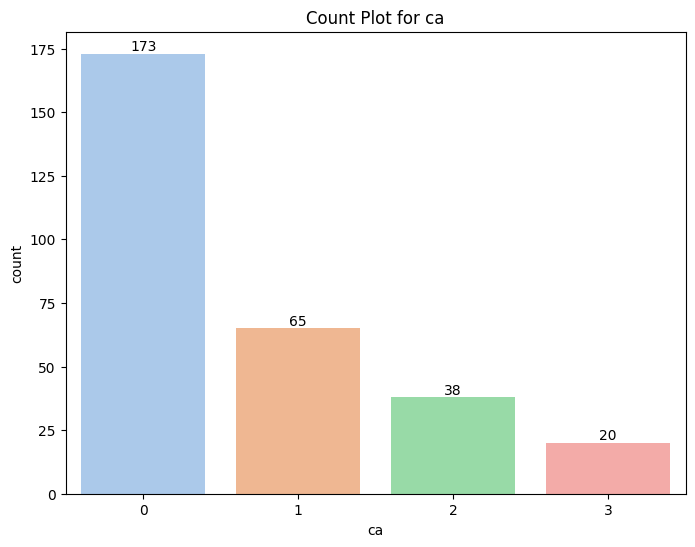

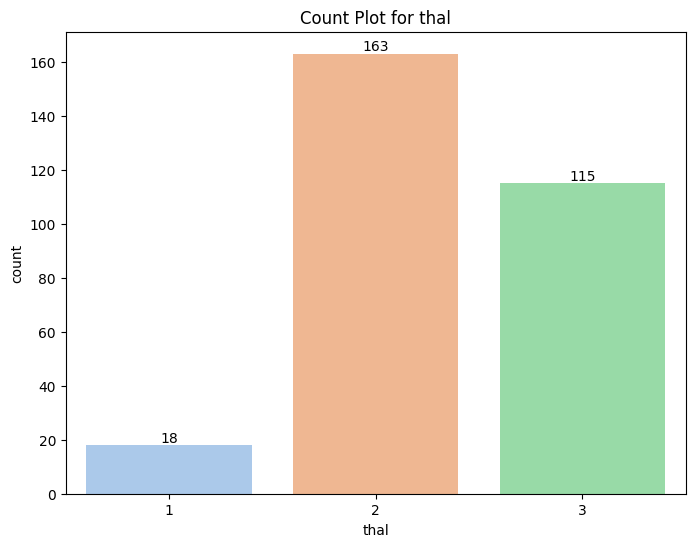

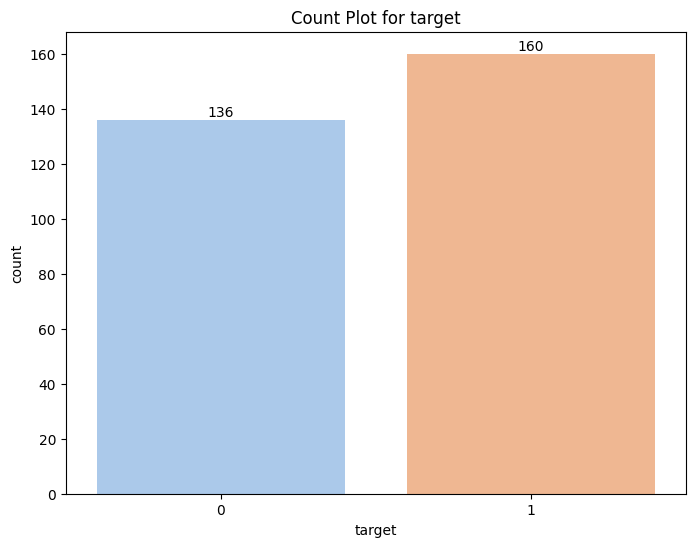

In [30]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for var in categorical_vars:
    plt.figure(figsize=(8,6))
    sns.countplot(x=var, data=dataset, palette='pastel')
    title = 'Count Plot for {}'.format(var)
    counts = dataset[var].value_counts().values
    value_counts = dataset[var].value_counts().sort_index()
    for i, count in enumerate(value_counts.values):
        plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
    plt.title(title)
    plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
#Correlation between the dataset features

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(dataset.corr(),annot=True,linewidth =2)
title = 'Correlation between dataset features'
plt.title(title)
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
title = 'Correlation with the target feature'
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind='bar', grid=True, figsize=(12, 8), title=title)
plt.xlabel('Feature')
plt.savefig(os.path.join(graph_dir, title + '.png'), bbox_inches='tight')
plt.show()
plt.close()